# ***Preface***

This Collab was made in accordance to Data Mining Project for CSE PDEU Sem 5.

Team: DMP_27 

---

19BCP016 - Bhagvatsinh Jadeja / 
19BCP093 - Pathik Viramgama / 
19BCP137 - Vatsal Sevalia



---



# ***Importing and Downloading Major Libraries***

In [68]:
!pip install --upgrade scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Working** **on** **The** ***Data***

In [69]:
#Loading data into variable using Pandas
data_df = pd.read_csv('/content/PM2.5 Global Air Pollution 2010-2017.csv')

In [70]:
#First Look at Dataset
data_df

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808
1,Angola,AGO,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505
2,Albania,ALB,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603
3,Andorra,AND,12.807198,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621
4,Arab World,ARB,53.787001,52.652279,53.297270,54.053822,52.583603,60.406813,58.764905,58.689259
...,...,...,...,...,...,...,...,...,...,...
235,Samoa,WSM,14.288094,14.693096,13.627882,13.382522,12.643560,12.321796,11.366298,11.548027
236,"Yemen, Rep.",YEM,45.979470,50.835291,51.434454,52.998443,48.338653,54.260287,50.127626,50.456007
237,South Africa,ZAF,27.138587,26.557873,26.577087,26.729262,26.722212,26.112972,25.140416,25.102205
238,Zambia,ZMB,28.836379,28.987117,29.742040,29.112221,28.493252,28.375452,27.355674,27.438035


In [71]:
#Target Attribute
data_df['2017']

0      56.910808
1      32.388505
2      18.200603
3      10.307621
4      58.689259
         ...    
235    11.548027
236    50.456007
237    25.102205
238    27.438035
239    22.251671
Name: 2017, Length: 240, dtype: float64

In [72]:
#Features
list(data_df.columns)

['Country Name',
 'Country Code',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [73]:
#checking for null values in whole dataset
data_df.isnull()

#there is no null values found in this dataset
#uncomment respectively if you add an extra to check the validity of project

#data_df.fillna(method ='pad') 
#data_df.fillna(method ='bfill')
#data_df.interpolate(method ='linear', limit_direction ='forward')
#data_df.dropna(axis = 0, how ='any')

#data_df.isnull()


,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
235,False,False,False,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False,False,False,False
237,False,False,False,False,False,False,False,False,False,False
238,False,False,False,False,False,False,False,False,False,False


In [74]:
#Checking for null values/ confirming the previous table using for loop for each column
for i in range(2010,2017):
  i = str(i)
  y = data_df[i].isnull().values.any()
  print(y)

False
False
False
False
False
False
False


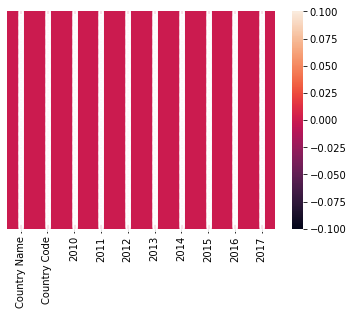

In [75]:
#heatmap of data proving there is no null values
sns.heatmap(data_df.isnull(),yticklabels=False, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

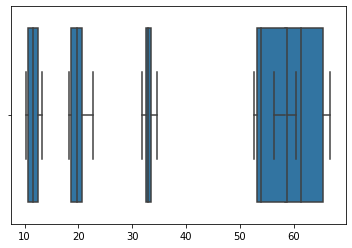

In [76]:
#Outlier detection
temp = data_df.drop(['Country Name','Country Code'],axis = 1)

#Our data's main label is country rather than the year. So we need to detect outlier row wise instead of column wise
for ind,row in temp.head().iterrows():
  sns.boxplot(row.tolist())

#NOTE: If you get the futureWarning error it is because there is no label given. However as we can see in the graph there is no outlier

# ***Splitting The Data***

In [77]:
#Preparing the data to get splitted
x = data_df.drop(['2017'], axis = 1)
y = data_df['2017']

#splitting into train and test
#best output was obtained for 30-70 split with no randomization 
from sklearn.model_selection import train_test_split
x_train_temp, x_test_temp, y_train_temp, y_test_temp = train_test_split(x,y,test_size = 0.3, random_state = 0)

#saving country names in different variables
test_countries = x_test_temp['Country Name']
train_countries = x_train_temp['Country Name']
test_codes = x_test_temp['Country Code']
train_codes = x_test_temp['Country Code']
name = data_df['Country Name']
code = data_df['Country Code']

#Preparing the Splitted data to load in Model
x_train = x_train_temp.drop(['Country Name','Country Code'], axis = 1)
y_train = y_train_temp
x_test = x_test_temp.drop(['Country Name','Country Code'], axis = 1)
y_test = y_test_temp



# ***Generalized Linear Regression Using Gamma Regression***

In [78]:
#importing specific library for gama regressor
from sklearn.linear_model import GammaRegressor

#Running the model on our splitted data
modelGamma = GammaRegressor()
modelGamma.fit(x_train, y_train)

GammaRegressor()

In [79]:
#Storing the prediction in variable
y_predGamma = modelGamma.predict(x_test)
y_predGamma

array([ 14.0988688 ,  13.49971036,  20.99165347,  12.98047721,
        13.60711409,  11.86262576, 115.04818148,  29.79830512,
        20.62491967,  37.34549215,  26.50436738,  11.33355307,
        13.53185958,  74.6569349 ,  40.85174596,  15.75310471,
       133.27482464,  19.40765822,  38.29718352,  13.92886687,
        33.32320167,  13.57115482,  34.19451706,  16.27510036,
        34.9700198 ,  16.95284765,  21.26065766,  15.72895591,
        18.04237961,  60.19541785,  39.70080345,  15.96454209,
        18.88285851,  18.99711332,  32.1260139 ,  25.21202343,
        51.36290435,  14.04518271,  12.7676127 ,  15.40463429,
        11.83040268,  17.39234703,  20.44012363,  17.96477429,
        14.36934486,  29.30495988,  18.6803907 ,  27.24918248,
        24.47891932,  19.22302464,  44.95866907,  16.00858757,
        13.37108917,  12.88567727,  53.28817982,  16.33113914,
        13.01998679,  16.82040653,  16.26074321,  21.58492463,
        19.26465089,  51.73601848,  16.57871318,  16.55

In [80]:
#Calculating Accuracy and RMS Error
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_predGamma))
print(np.sqrt(mean_squared_error(y_test, y_predGamma)))

0.827720487119502
7.53685235156388


Text(0.5, 1.0, 'Gamma Regressor Actual 2017 vs. Predicted 2017')

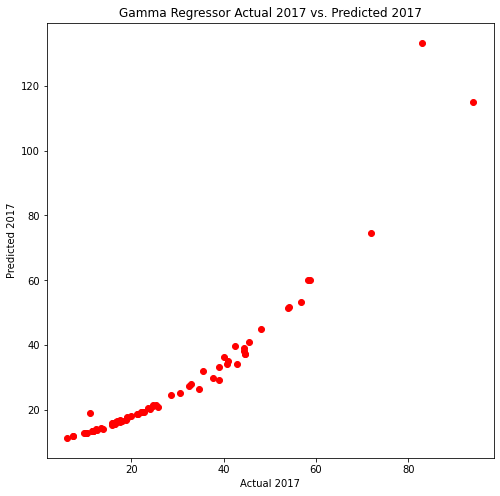

In [81]:
#plotting Scatter graph for Actual vs Predicted
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predGamma, color = 'red')
plt.xlabel('Actual 2017')
plt.ylabel('Predicted 2017')
plt.title('Gamma Regressor Actual 2017 vs. Predicted 2017')

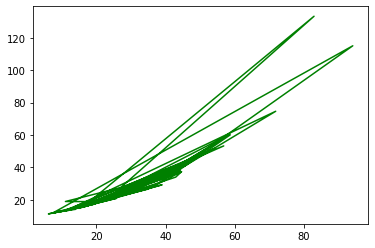

In [82]:
#plotting continous graph for Actual vs Predicted
plt.plot(y_test,y_predGamma ,'g-')

In [83]:
#This model uses Quadratic hypothesis function as evident by graph
#Hence the accuracy is 0.82
#Lets try with a Linear hypothsis function
#best way to address this problem is to use Simple Linear Regression

# ***Linear Regression Model***

In [84]:
#importing LinearRegression Algorithm
from sklearn.linear_model import LinearRegression

#Running the model on our splitted data
modelLR = LinearRegression()
modelLR.fit(x_train,y_train)

LinearRegression()

In [85]:
#Storing the prediction in variable
y_predLr = modelLR.predict(x_test)
y_predLr

array([13.10019325, 11.69948933, 26.63994583, 10.2790596 , 11.6363029 ,
        7.28225588, 86.25037088, 38.10419841, 23.34350548, 44.44746746,
       35.5286658 ,  5.96579199, 11.34265401, 71.4308761 , 45.51607481,
       16.18904084, 82.41402299, 23.0995543 , 44.7473802 , 12.2583724 ,
       39.05661248, 11.53728224, 40.56163964, 16.63136052, 40.9433535 ,
       18.75116897, 25.12407378, 16.12310087, 20.24835239, 58.57560502,
       43.17556351, 15.66878158, 21.46308411, 16.38900482, 36.49974996,
       30.45864552, 54.54517387, 12.4650757 ,  9.59136699, 15.86162737,
        7.1960572 , 18.99141228, 24.00475383, 19.33675658, 13.26729256,
       38.55600602, 21.0400899 , 32.40516543, 28.63893096, 21.66829446,
       49.038065  , 15.81902638, 11.37573827, 10.00296638, 56.72681939,
       17.56434543, 10.15559803, 17.56766161, 16.60605299, 25.31668853,
       22.05232959, 54.80037587, 17.77471344, 16.81332099, 15.93979517,
       25.74691196, 42.03467833, 44.44522388, 40.59612982, 44.01

Text(0.5, 1.0, 'Actual 2017 vs. Predicted 2017')

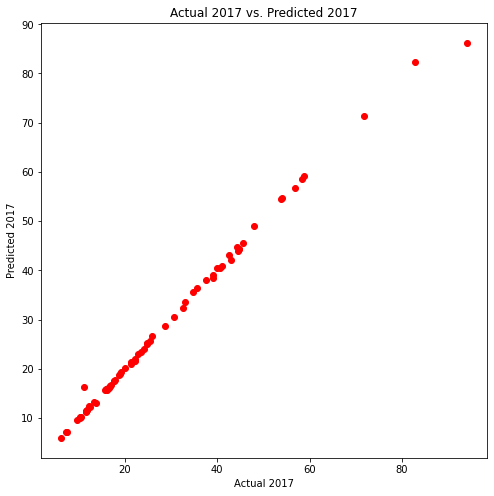

In [86]:
#plotting Scatter graph for Actual vs Predicted
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predLr, color = 'red')
plt.xlabel('Actual 2017')
plt.ylabel('Predicted 2017')
plt.title('Actual 2017 vs. Predicted 2017')

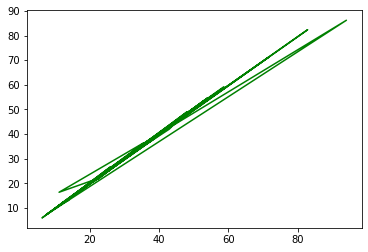

In [87]:
#plotting continous graph for Actual vs Predicted
plt.plot(y_test,y_predLr ,'g-')

In [88]:
#Now as we can see in graph we have obtained best results!
#So our accuracy will be better than Gamma Regressor

In [89]:
#Tabular form of Prediction vs Actual and difference in their values
pred_y_df_Lr = pd.DataFrame({'Country Name':test_countries,'Country Code':test_codes, 'Actual Value':y_test,'predicted value':y_predLr, 'Difference': y_test-y_predLr})

#Saving the comparision table in drive
#You can donwload it from Home Page of Files
pred_y_df_Lr.to_csv('/content/Comparision Table.csv')
pred_y_df_Lr

,Country Name,Country Code,Actual Value,predicted value,Difference
109,Kazakhstan,KAZ,13.824288,13.100193,0.724095
71,France,FRA,11.814964,11.699489,0.115474
37,Cote d'Ivoire,CIV,25.886266,26.639946,-0.753679
74,United Kingdom,GBR,10.472690,10.279060,0.193631
108,Japan,JPN,11.704778,11.636303,0.068475
...,...,...,...,...,...
218,Sub-Saharan Africa (IDA & IBRD countries),TSS,44.602096,44.445224,0.156872
129,Late-demographic dividend,LTE,40.000207,40.596130,-0.595923
73,Gabon,GAB,44.385548,44.017877,0.367672
4,Arab World,ARB,58.689259,59.253161,-0.563902


In [90]:
#Calculating Accuracy and RMS Error
from sklearn.metrics import r2_score,mean_squared_error
print("Accuracy: ",r2_score(y_test,y_predLr))
print("Mean Sqaure Root Error: ",np.sqrt(mean_squared_error(y_test, y_predLr)))

Accuracy:  0.9958288024910575
Mean Sqaure Root Error:  1.172744938160467


# **Conclusion**

As the data set was not highly dimensional, the results of simple linear regression is better than advancede linear regressions. Also the data set was squeaky clean and no null values or outliers or redundant values, rows, columns were found. Hence the prediction was 99 percent accurate.

Since all the extensions are useless here we will have final answer from Linear Regression. Uncommnting the data reduction code, changing the directory for your new dataset and dropping respective columns, this code will work for all other datasets as well.